In [63]:
%matplotlib widget
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.manifold import TSNE
from umap import UMAP


In [64]:
names = ['X', 'Y', 'Z']
mammonth = pd.read_csv(r'D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\lab_3_4\datasets\mammonth\mammoth.csv', header = 0, names = names)
mammonth

X        Y        Z
0       58.823  228.407   79.843
1       59.197  228.642   77.478
2       58.734  228.931   78.515
3       59.043  228.693   78.571
4       59.223  228.667   78.611
...        ...      ...      ...
999773  45.775  313.390  117.697
999774  54.707  323.795  -80.527
999775  53.756  324.630  -83.203
999776  49.131  319.816  -26.200
999777  27.283  296.150   97.069

[999778 rows x 3 columns]

In [65]:
mammonth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999778 entries, 0 to 999777
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X       999778 non-null  float64
 1   Y       999778 non-null  float64
 2   Z       999778 non-null  float64
dtypes: float64(3)
memory usage: 22.9 MB


In [66]:
mammonth.describe()

X              Y              Z
count  999778.000000  999778.000000  999778.000000
mean       76.640520     353.807856      45.878165
std        33.858831     105.516480      89.852235
min       -22.533000      60.952000    -172.225000
25%        50.896000     289.240000      15.191250
50%        76.649000     335.656000      80.701000
75%       102.445000     435.566000     112.860000
max       169.603000     568.916000     172.238000

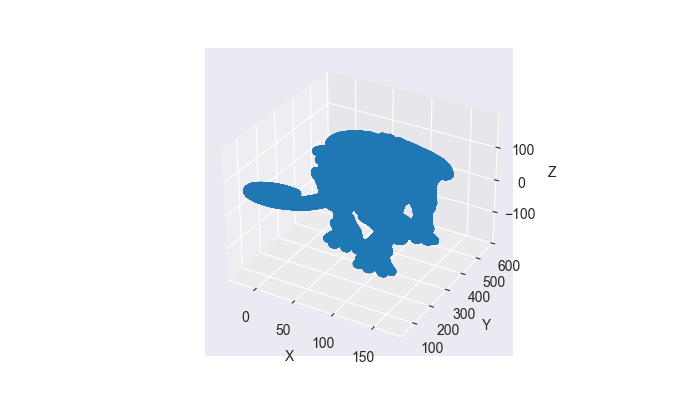

In [67]:
fig = plt.figure(figsize=(7, 4))
ax_3d = fig.add_subplot(111, projection='3d')
ax_3d.set_xlabel('X')
ax_3d.set_ylabel('Y')
ax_3d.set_zlabel('Z')
ax_3d.scatter(mammonth['X'], mammonth['Y'], mammonth['Z'])
plt.show()

Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data 1.300893783569336


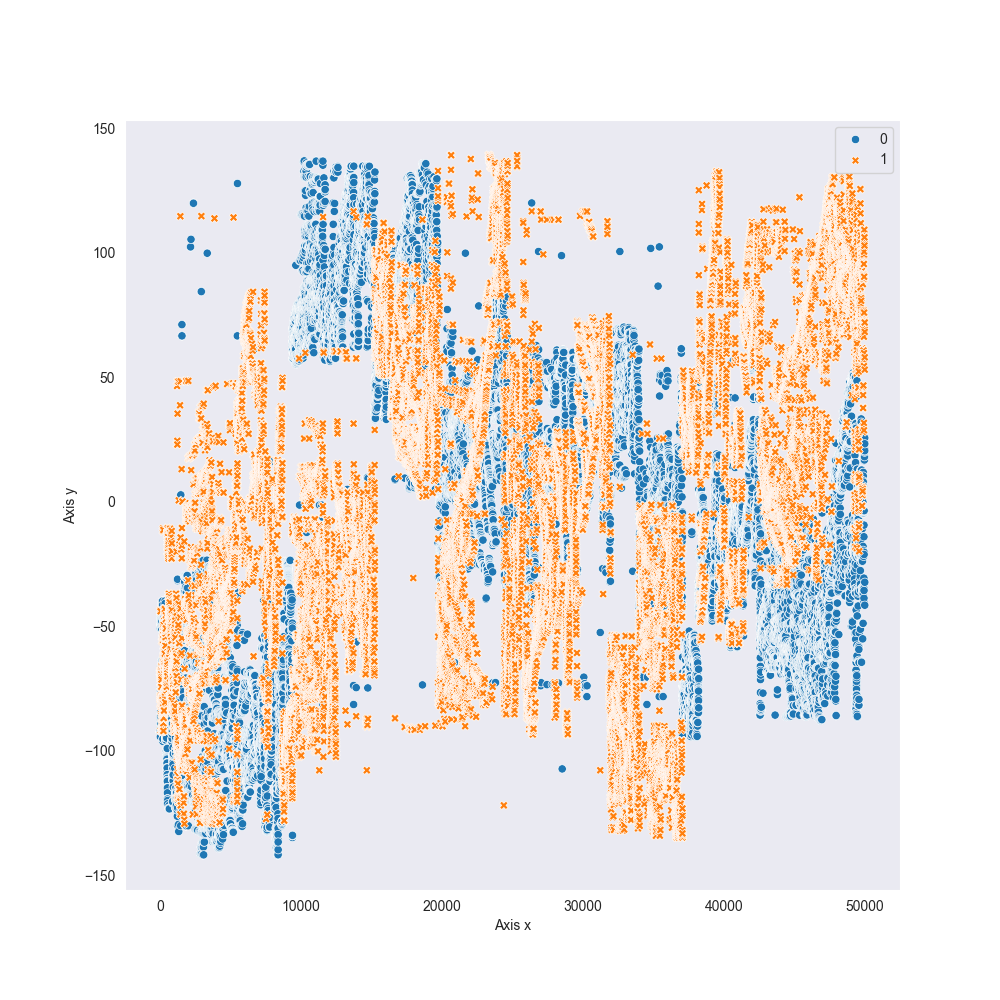

In [68]:
def plot_tsne(X, title, save=False, save_name="tsne"):
    tsne = TSNE(n_components=2, learning_rate='auto',
                init='pca', perplexity=12, method='barnes_hut')
    X_tsne = tsne.fit_transform(X)
    print(
        f"Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data {tsne.kl_divergence_}")
    plt.figure(figsize=(10, 10))
    sns.scatterplot(X_tsne)
    # plt.axis("equal")
    plt.ylabel("Axis y")
    plt.xlabel("Axis x")
    # plt.legend(title="Class")
    # plt.title(title)
    plt.grid()
    if save:
        plt.savefig(fname=f'images/{save_name}.png', dpi=300,
                    format='png',  bbox_inches='tight')
    plt.show()


plot_tsne(mammonth.iloc[:50000,], save=False, save_name="initial_tsne",
          title="TSNE 2-Dimensional representation of the 3-Dimensional feature space")

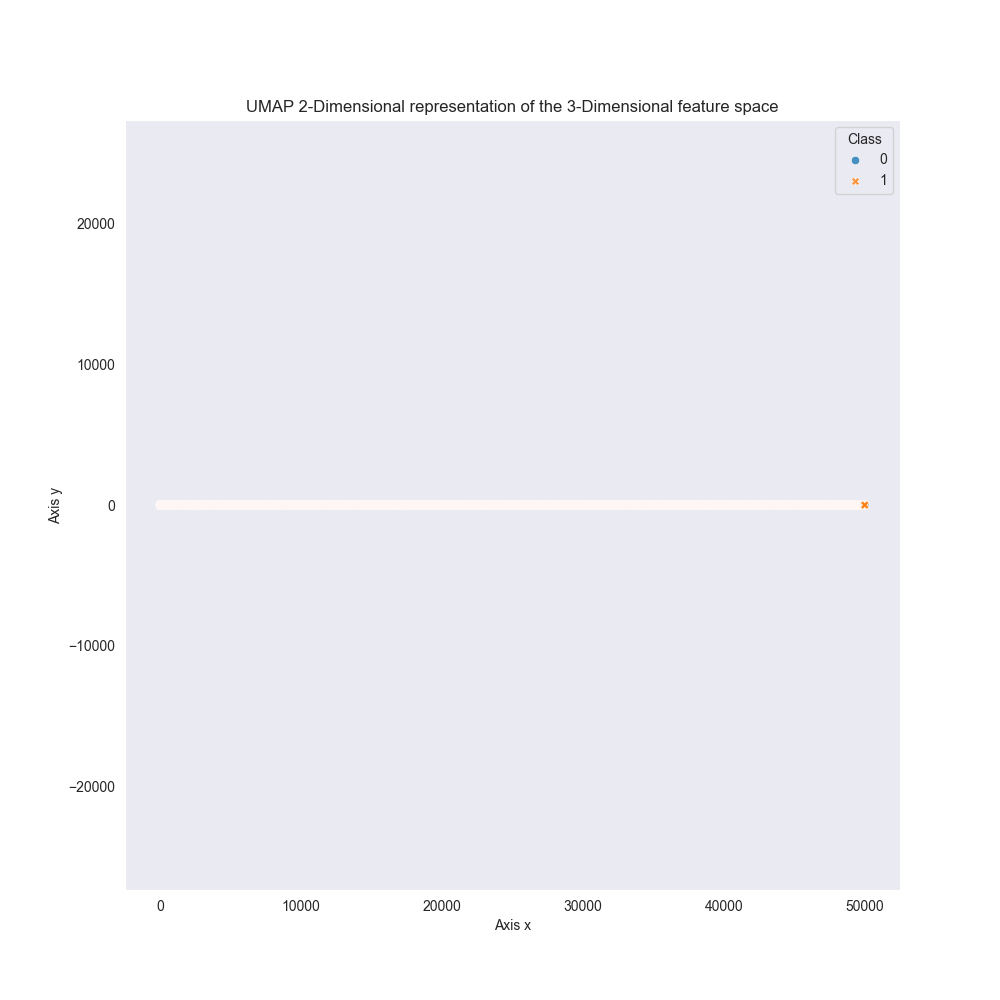

In [69]:
def plot_umap(X, title, save=False, save_name="umap",n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation'):
    umap = UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric)
    X_umap = umap.fit_transform(X)
    plt.figure(figsize=(10, 10))
    sns.scatterplot(X_umap, alpha=0.8)
    plt.axis("equal")
    plt.ylabel("Axis y")
    plt.xlabel("Axis x")
    plt.legend(title="Class")
    plt.title(title)
    plt.grid()
    if save:
        plt.savefig(fname=f'images/{save_name}.png', dpi=300,
                    format='png',  bbox_inches='tight')
    plt.show()


plot_umap(mammonth.iloc[:50000,], save=False, save_name="initial_tsne",
          title="UMAP 2-Dimensional representation of the 3-Dimensional feature space")

In [75]:
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)
X_full, y_full = mammonth.loc[:,["X","Y"]], mammonth.loc[:,'Z']
feature_mapping = {
    "X": "X",
    "Y": "Y"
}
features = ["X", "Y"]
X = mammonth.loc[:, features]
distributions = [
    ("Unscaled data", X),
    ("Data after standard scaling", StandardScaler().fit_transform(X)),
    ("Data after min-max scaling", MinMaxScaler().fit_transform(X)),
    ("Data after max-abs scaling", MaxAbsScaler().fit_transform(X)),
    (
        "Data after robust scaling",
        RobustScaler(quantile_range=(25, 75)).fit_transform(X),
    ),
    (
        "Data after power transformation (Yeo-Johnson)",
        PowerTransformer(method="yeo-johnson").fit_transform(X),
    ),
    # (
    #     "Data after power transformation (Box-Cox)",
    #     PowerTransformer(method="box-cox").fit_transform(X),
    # ),
    (
        "Data after quantile transformation (uniform pdf)",
        QuantileTransformer(
            output_distribution="uniform", random_state=42
        ).fit_transform(X),
    ),
    (
        "Data after quantile transformation (gaussian pdf)",
        QuantileTransformer(
            output_distribution="normal", random_state=42
        ).fit_transform(X),
    ),
    ("Data after sample-wise L2 normalizing", Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)

In [76]:
def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )

def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")

In [77]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(
        axarr[0],
        X,
        y,
        hist_nbins=200,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Full data",
    )

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )
    plot_distribution(
        axarr[1],
        X[non_outliers_mask],
        y[non_outliers_mask],
        hist_nbins=50,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Zoom-in",
    )

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="Color mapping for values of y",
    )

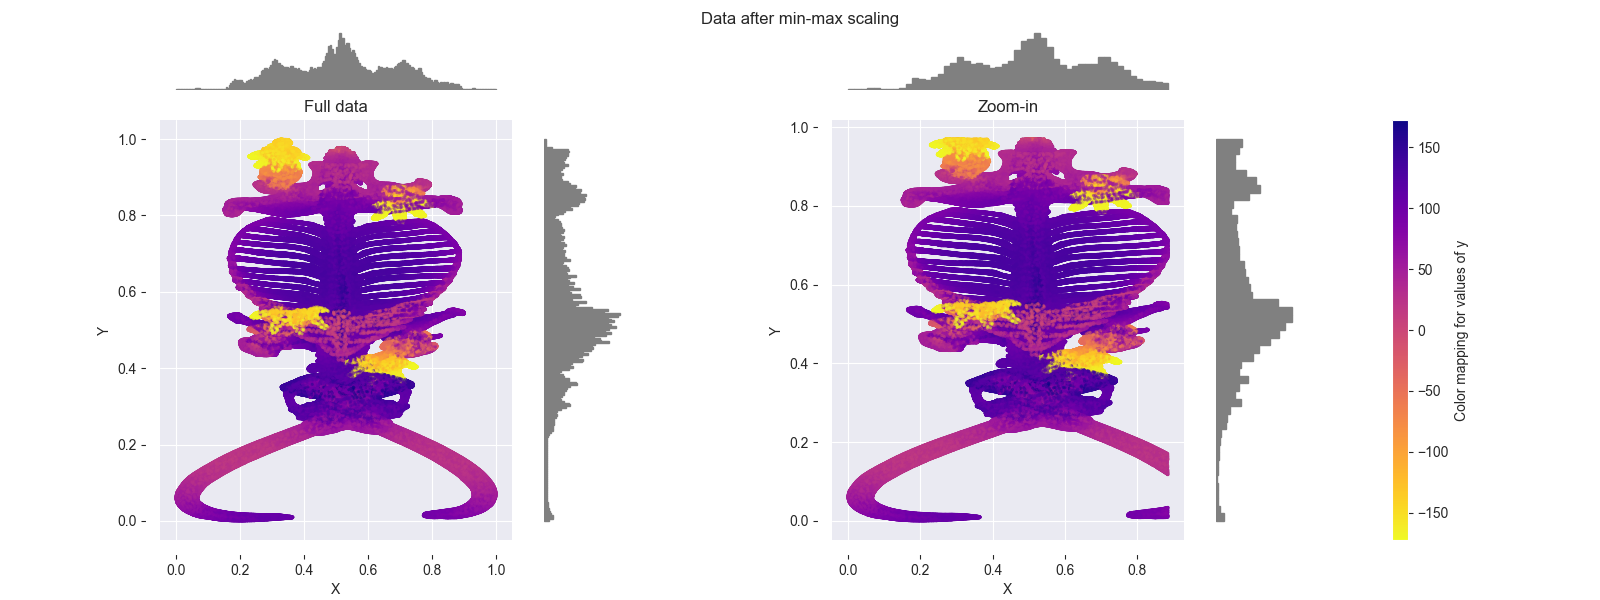

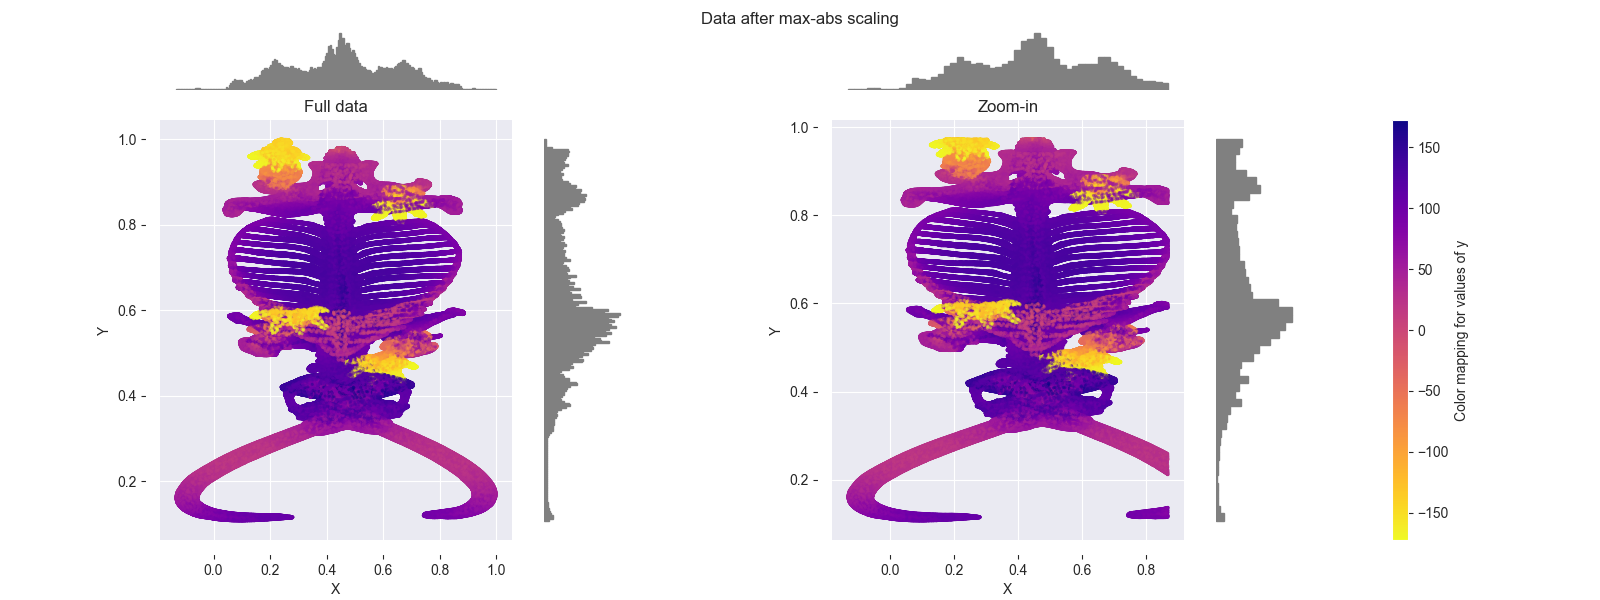

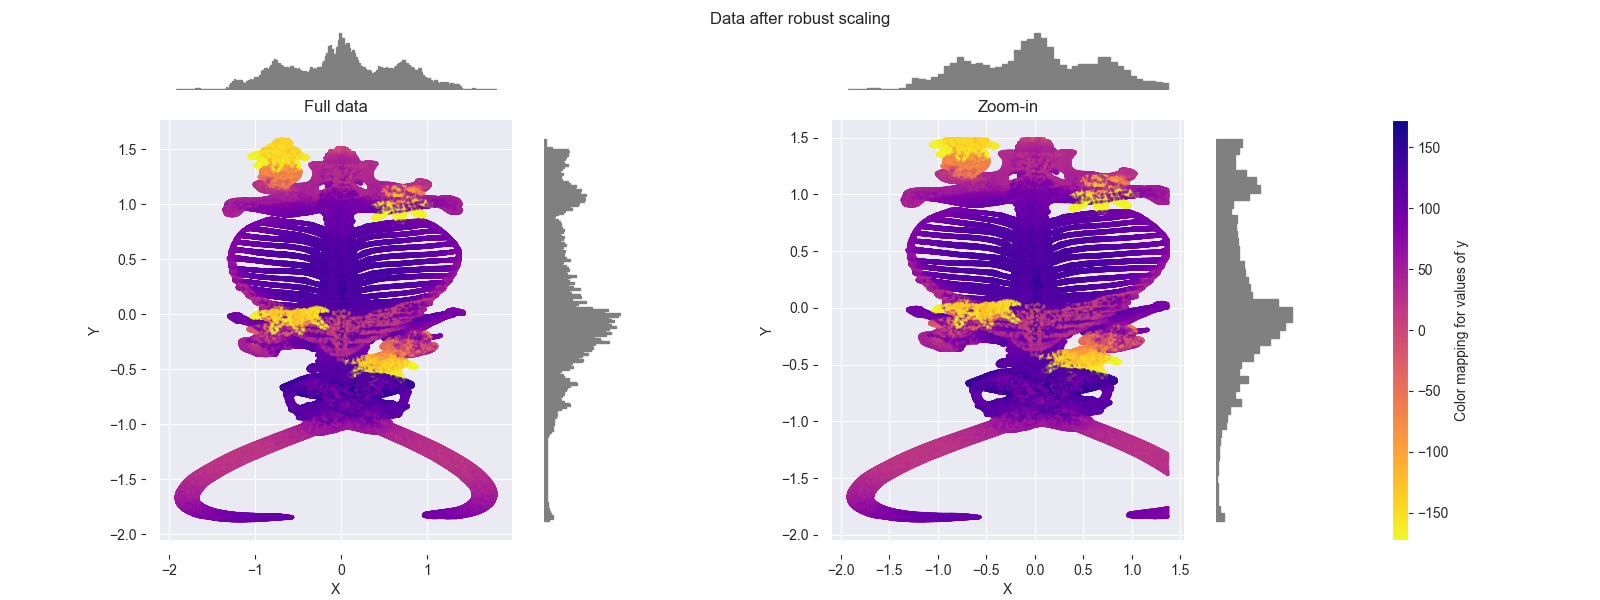

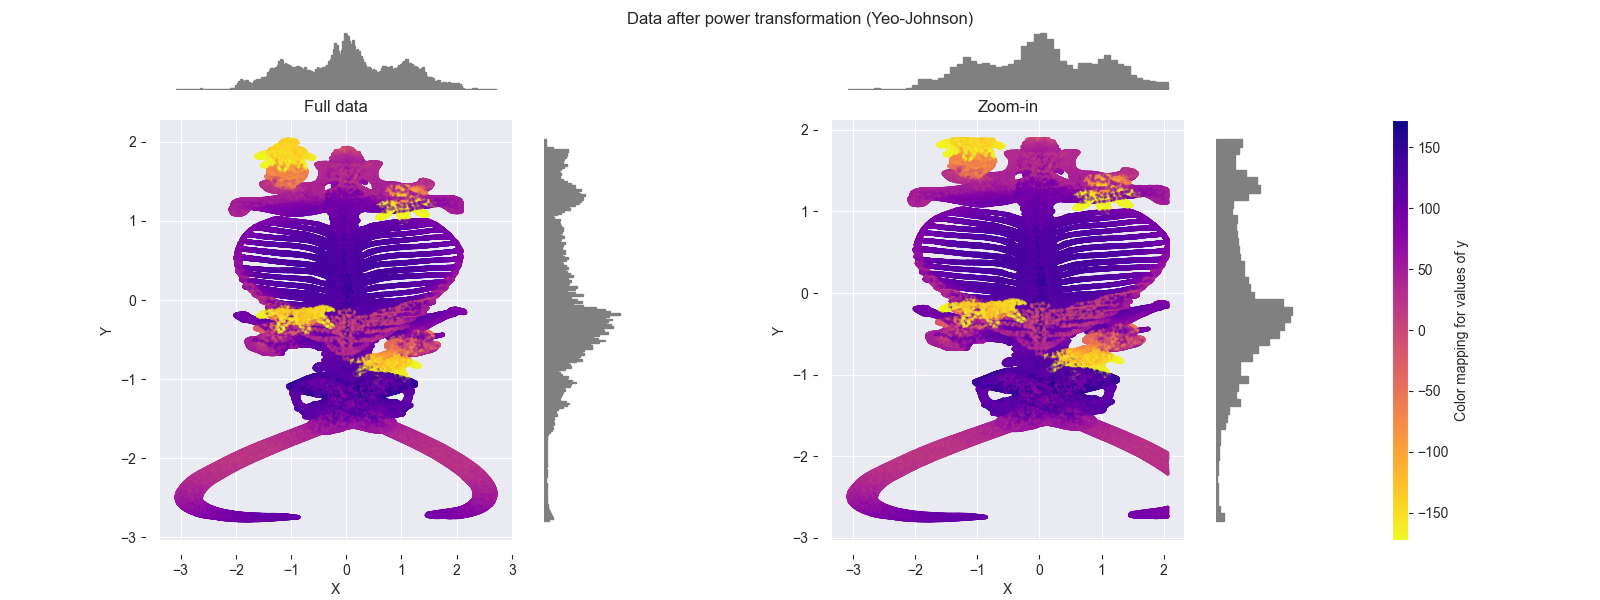

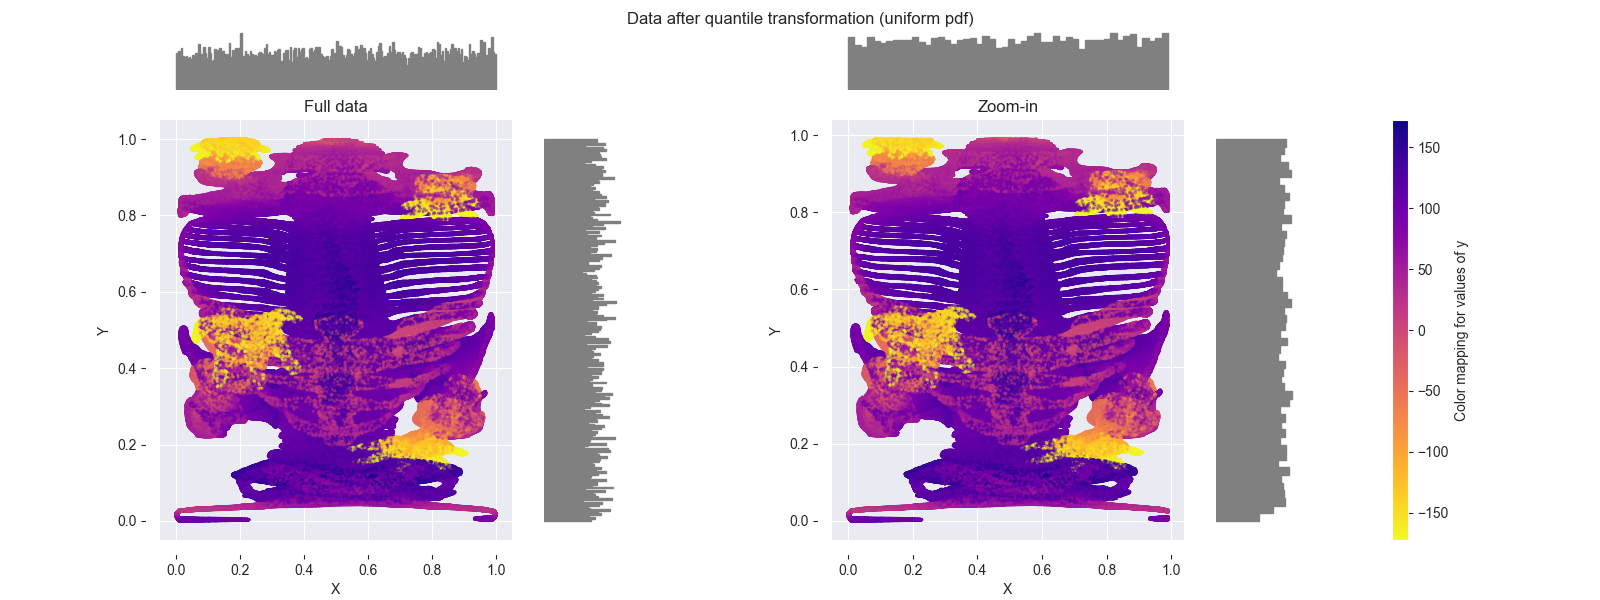

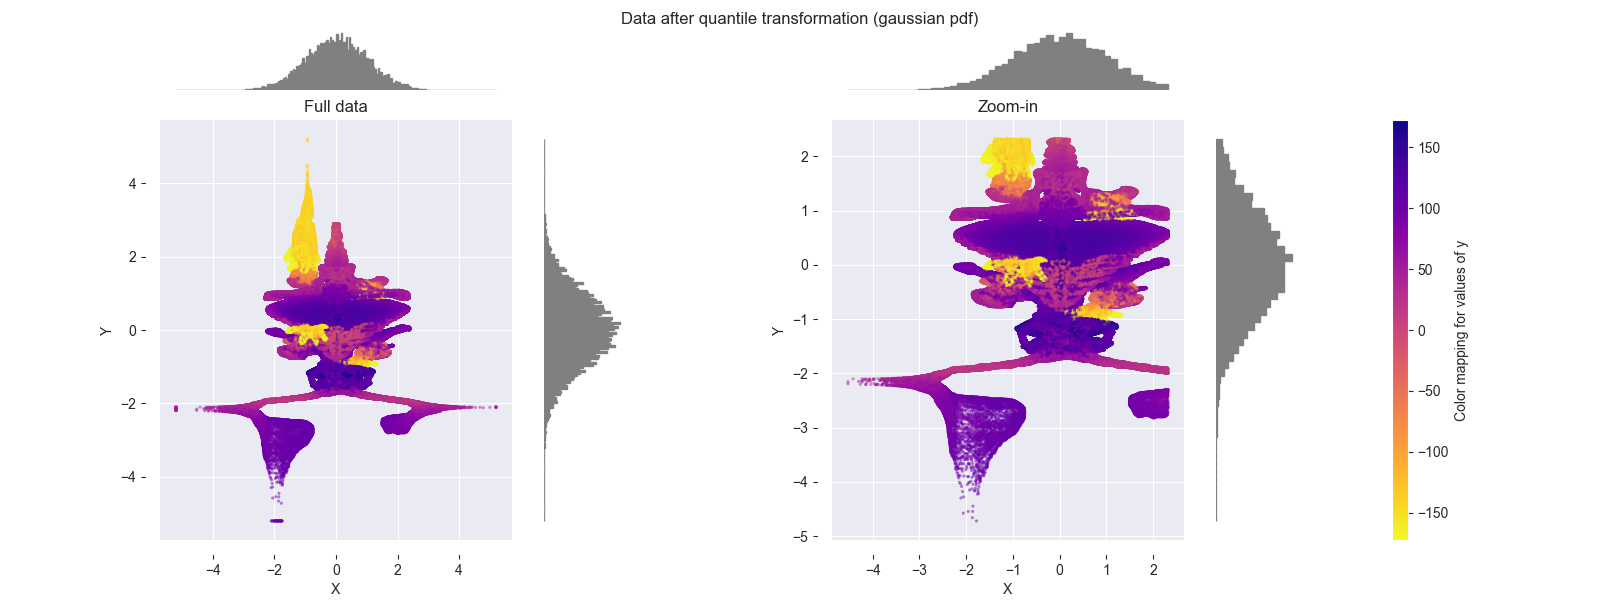

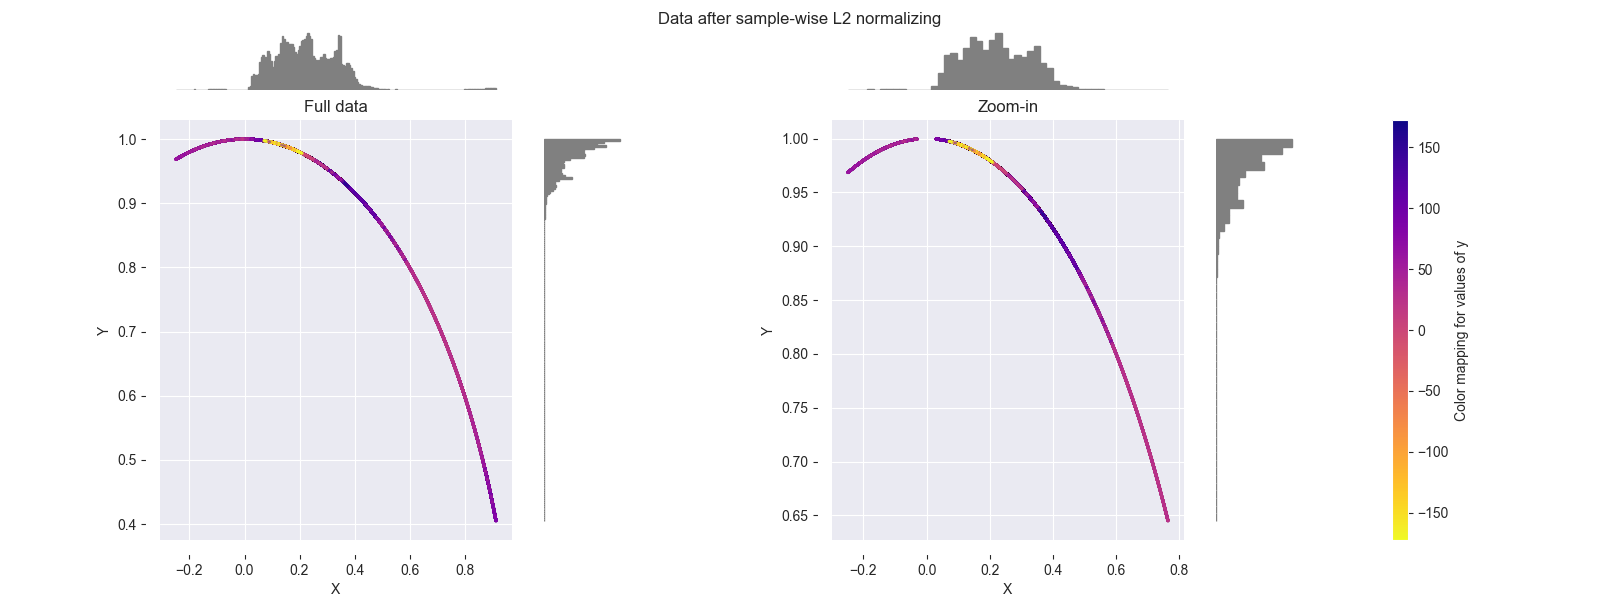

In [78]:
# make_plot(1)
make_plot(2)
make_plot(3)
make_plot(4)
make_plot(5)
make_plot(6)
make_plot(7)
make_plot(8)